## Import dependencies

In [7]:
import torch
import torchvision

from torchvision import datasets, transforms

import pathlib
import matplotlib.pyplot as plt

In [2]:
# Setup data directory
data_dir = pathlib.Path("data")
data_dir

PosixPath('data')

## Download Food101 Data

In [3]:
# Get training data
train_dataset = datasets.Food101(root=data_dir,
                                 split="train",
                                 download=True)

# Get testing data
test_dataset = datasets.Food101(root=data_dir,
                                split="test",
                                download=True)

100%|██████████| 4996278331/4996278331 [03:06<00:00, 26773901.19it/s]


Extracting data/food-101.tar.gz to data


In [4]:
class_names = train_dataset.classes
class_names[:10], len(class_names)

In [5]:
img, img_label = train_dataset[0][0], class_names[train_dataset[0][1]]

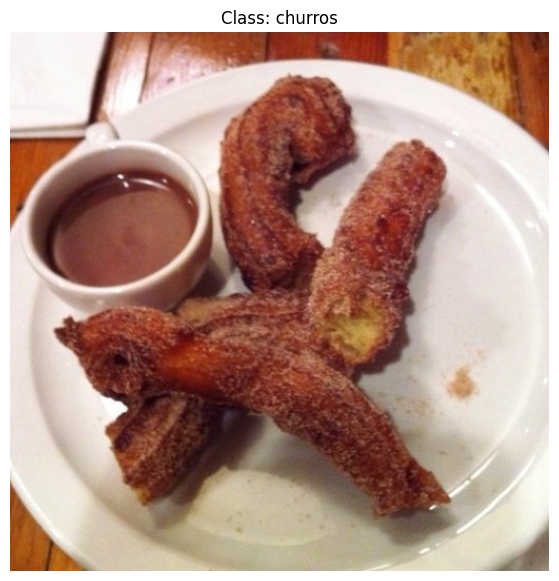

In [10]:
plt.figure(figsize=(10, 7))
plt.imshow(img)
title_text = f"Class: {img_label}"
plt.title(title_text)
plt.axis(False)
plt.show()

## Determine subset of required image classes

In [24]:
import random

random.seed(1)
target_classes = random.sample(class_names, 3)

target_classes

['cheesecake', 'pancakes', 'takoyaki']

In [27]:
# Setup data path
data_path = data_dir / "food-101" / "images"

# Percentage of images for each class
amount_to_get = 0.2

def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["cheesecake", "pancakes", "takoyaki"],
               amount=0.2,
               seed=42):
  random.seed(42)
  label_splits = {}

  # Get labels
  for data_split in data_splits:
    print(f"[INFO] Creating image split for: {data_split}")
    label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
    with open(label_path, "r") as f:
      labels = [line.strip('\n') for line in f.readlines() if line.split('/')[0] in target_classes]

    number_to_sample = round(amount * len(labels))
    print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}")
    sampled_images = random.sample(labels, k=number_to_sample)

    image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
    label_splits[data_split] = image_paths

  return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits, label_splits.keys()

[INFO] Creating image split for: train
[INFO] Getting random subset of 450 images for train
[INFO] Creating image split for: test
[INFO] Getting random subset of 150 images for test


({'train': [PosixPath('data/food-101/images/cheesecake/323244.jpg'),
   PosixPath('data/food-101/images/cheesecake/1526740.jpg'),
   PosixPath('data/food-101/images/pancakes/3041237.jpg'),
   PosixPath('data/food-101/images/pancakes/2351786.jpg'),
   PosixPath('data/food-101/images/pancakes/193212.jpg'),
   PosixPath('data/food-101/images/cheesecake/3748350.jpg'),
   PosixPath('data/food-101/images/cheesecake/3042719.jpg'),
   PosixPath('data/food-101/images/takoyaki/929601.jpg'),
   PosixPath('data/food-101/images/cheesecake/2771236.jpg'),
   PosixPath('data/food-101/images/takoyaki/2101329.jpg'),
   PosixPath('data/food-101/images/cheesecake/1656986.jpg'),
   PosixPath('data/food-101/images/cheesecake/1624884.jpg'),
   PosixPath('data/food-101/images/cheesecake/2901903.jpg'),
   PosixPath('data/food-101/images/pancakes/1775490.jpg'),
   PosixPath('data/food-101/images/pancakes/2092418.jpg'),
   PosixPath('data/food-101/images/takoyaki/3809028.jpg'),
   PosixPath('data/food-101/images

In [ ]:
for line in